In [2]:
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import lognorm
from scipy.special import erf
import matplotlib.pyplot as plt

In [15]:
import bqrt as bq

ModuleNotFoundError: No module named 'bqrt'

In [3]:
# Reference
# https://en.wikipedia.org/wiki/Normal_distribution
# https://en.wikipedia.org/wiki/Log-normal_distribution
# https://en.wikipedia.org/wiki/Error_function
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
# https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.stats.lognorm.html

def norm_pdf(x,mu,sigma):
    return 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-(x-mu)**2/(2*sigma**2))

def norm_cdf(x,mu,sigma):
    return 0.5*( 1 + erf((x-mu)/(sigma*np.sqrt(2))))
             
def logn_pdf(x,mu,sigma):
    return 1/(x*sigma*np.sqrt(2*np.pi)) * np.exp(-(np.log(x)-mu)**2/(2*sigma**2))

def logn_cdf(x,mu,sigma):
    return 0.5*( 1 + erf((np.log(x)-mu)/(sigma*np.sqrt(2))))

# normal mean, calculated from log-normal mu and sigma
def norm_mean(logn_mean,logn_var):
    return np.log(logn_mean) - 0.5*np.log(1+logn_mean/logn_var**2)

# normal variance, calculated from log-normal mu and sigma
def norm_var(logn_mean, logn_var):
    return np.log(1+logn_mean/logn_var**2)

# log normal mean 
def lognorm_mean(norm_mean,norm_var):
    return np.exp(norm_mean + norm_var/2)

# log normal variance
def lognorm_var(norm_mean, norm_var):
    return np.exp(2*n_mean+n_var) * (np.exp(n_var)-1)

In [10]:
# testing for PDF and CDF function

x = 0.2
mu = 0
sigma = 1

print(norm_pdf(x,mu,sigma))
print(norm.pdf(x,mu,sigma))

print(logn_pdf(x,mu,sigma))
print(lognorm.pdf(x,sigma,0,np.exp(mu)))

print(norm_cdf(x,mu,sigma))
print(norm.cdf(x,mu,sigma))

print(logn_cdf(x,mu,sigma))
print(lognorm.cdf(x,sigma,0,np.exp(mu)))

0.3910426939754559
0.3910426939754559
0.5462678707581801
0.5462678707581802
0.579259709439103
0.579259709439103
0.05376031045166313
0.053760310451663136


## nomal与log-normal相互转化

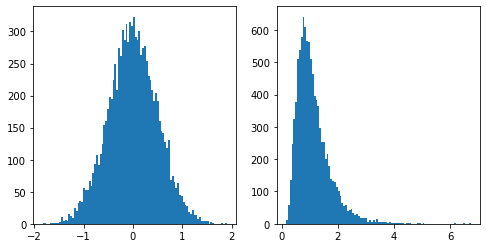

In [171]:
# 对于随机变量X，如服从正态分布，对其取指数，exp(X)其服从对数分布

f, axs = plt.subplots(2,2,figsize=(8,4))
a = np.random.normal(0,0.5,10000)

plt.subplot(1, 2, 1)
_ = plt.hist(a, bins=100)

b = np.exp(a) # 取指数
plt.subplot(1, 2, 2)
_ = plt.hist(b, bins=100)

plt.show()

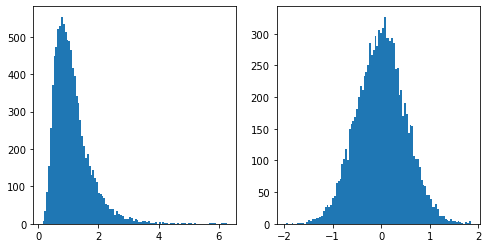

In [172]:
# 对于随机变量X，如服从对数正态分布，对其取对数，则log(X)其服从对数分布

f, axs = plt.subplots(2,2,figsize=(8,4))
a = np.random.lognormal(0,0.5,10000)

plt.subplot(1, 2, 1)
_ = plt.hist(a, bins=100)

b = np.log(a) # 取对数
plt.subplot(1, 2, 2)
_ = plt.hist(b, bins=100)

plt.show()

## CDF 与 PDF

In [180]:
# 两者CDF相同，但PDF不同相同相差系数1/x

x = 0.1
mu = 0
sigma = 1

# print(norm.pdf(np.log(x),mu,sigma))
# print(lognorm.pdf(x,sigma,mu,np.exp(mu)))
print(1/x*norm_pdf(np.log(x),mu,sigma))
print(logn_pdf(x,mu,sigma))

# print(norm.cdf(np.log(x),mu,sigma))
# print(lognorm.cdf(x,sigma,mu,np.exp(mu)))
print(norm_cdf(np.log(x),mu,sigma))
print(logn_cdf(x,mu,sigma))

0.2815901890152684
0.28159018901526833
0.010651099341700165
0.010651099341700165


In [161]:
# 两者CDF相同，但PDF相同

x = 0.1
mu = 0
sigma = 1

print(norm.cdf(x,mu,sigma))
print(lognorm.cdf(np.exp(x),sigma,mu,np.exp(mu)))

print(norm.pdf(x,mu,sigma))
print(lognorm.pdf(np.exp(x),sigma,mu,np.exp(mu)))

0.539827837277029
0.539827837277029
0.3969525474770118
0.3591775181418959


In [114]:
# 两者CDF相同，但PDF相同

x = 0.2
mu = 0
sigma = 1

print(norm.cdf(np.log(x),mu,sigma))
print(lognorm.cdf(x,sigma,mu,np.exp(mu)))

print(norm.pdf(np.log(x),mu,sigma))
print(lognorm.pdf(x,sigma,mu,np.exp(mu)))

0.053760310451663136
0.053760310451663136
0.10925357415163602
0.5462678707581802


C:\Users\dyang\AppData\Local\Temp/ipykernel_4280/4197868054.py:15: RuntimeWarning: invalid value encountered in log
  return 1/(x*sigma*np.sqrt(2*np.pi)) * np.exp(-(np.log(x)-mu)**2/(2*sigma**2))


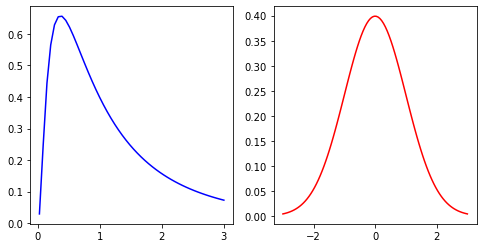

In [167]:
mu = 0
sigma = 1
var = sigma^2

f, axs = plt.subplots(2,2,figsize=(8,4))
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

plt.subplot(1, 2, 1)
plt.plot(x, lognorm_pdf(x,mu,sigma), color='blue')

# x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.subplot(1, 2, 2)
plt.plot(x, norm_pdf(x,mu,sigma), color='red')

plt.show()

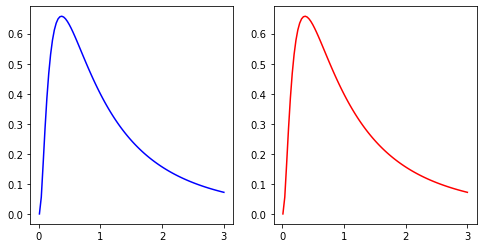

In [87]:
mu = 0
sigma = 1
var = sigma**2

f, axs = plt.subplots(2,2,figsize=(8,4))
x = np.linspace(0.01, mu + 3*sigma, 100)

plt.subplot(1, 2, 1)
plt.plot(x, lognorm_pdf(x,mu,sigma), color='blue')

# x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.subplot(1, 2, 2)
plt.plot(x, lognorm.pdf(x,sigma,mu,np.exp(mu)), color='red')

plt.show()

## 正态与对数正态的均值与方差

In [183]:
a = np.random.normal(0,1,1000000)

-0.00013084767745556272 0.9995209959845468


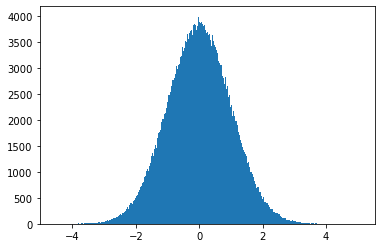

In [186]:
_ = plt.hist(a, bins=1000)

n_mean = np.mean(a)
n_var = np.var(a)

print(n_mean,n_var)

1.649100477592696 4.72818088807344


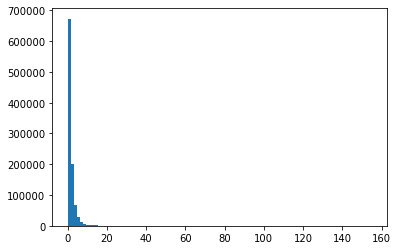

In [187]:
b = np.exp(a)
_ = plt.hist(b, bins=100)

l_mean = np.mean(b)
l_var = np.var(b)

print(l_mean, l_var)

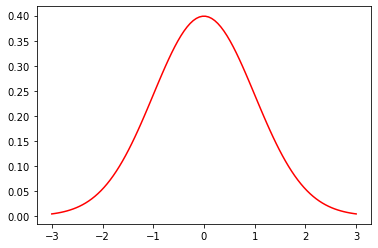

In [27]:
mu = 0
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='red')
plt.show()

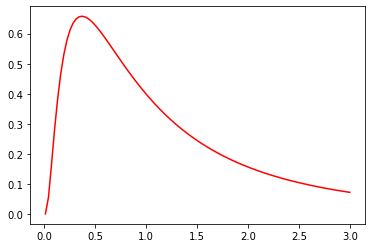

In [130]:
mu = 0 # mu is set at 0
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(0.01, mu + 3*sigma, 100)
plt.plot(x, stats.lognorm.pdf(x, sigma), color='red')
plt.show()